라이브러리 불러오기

In [121]:
import pandas as pd
import numpy as np
from datetime import datetime

파일 불러오기

In [122]:
smart_farm = pd.read_csv("smart_farm.csv")
columns = pd.read_csv("(스마트팜)테이블 정의서.csv")

In [123]:
smart_farm.head(3)

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9


컬럼명 재정의

In [124]:
columns

,변수명,정의
0,yy,년도
1,mm,월
2,dd,일
3,hh,시
4,nn,분
5,insolation,일사량(W/㎡)
6,out_tmperature,외기온(℃)
7,out_humidity,외기습도(%)
8,wind_speed,풍속(m/s)
9,wind_direction,풍향(º)


In [125]:
smart_farm.columns = list(columns["정의"])
smart_farm.head()

,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021,11,26,0,3,-3.0,5.7,67,1.3,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021,11,26,0,4,-2.8,5.7,67,0.9,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


In [126]:
smart_farm["일사량(W/㎡)"].describe()

count    152640.000000
mean        143.307860
std         224.014679
min          -5.500000
25%          -3.300000
50%          -2.300000
75%         260.000000
max        1144.000000
Name: 일사량(W/㎡), dtype: float64

### Datetime 생성
- 년 월 일 시 분 합치기
- 링크 : https://www.daleseo.com/python-datetime/

In [127]:
time_lst = []
ymd_lst = []

for idx, row in smart_farm.iterrows():
    date = datetime(int(row["년도"]), int(row["월"]), int(row["일"]), int(row["시"]), int(row["분"]))
    time_lst.append(date)
    
    ymd = datetime(int(row["년도"]), int(row["월"]), int(row["일"]))
    ymd_lst.append(ymd)
    
smart_farm["시간"] = time_lst
smart_farm["년월일"] = ymd_lst

In [128]:
smart_farm = smart_farm[["시간","년월일","년도",'월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)',
       '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)',
       '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '환기온도(천창 제어온도)',
       '난방온도(설정온도)', '열공급량(kWh)']]

시간 column -> 고유 PK로 설정가능

In [129]:
smart_farm[smart_farm["시간"].duplicated()]

smart_farm_df = smart_farm.set_index("시간")

### 결측치 확인
- y값 결측 확인
- x값 결측 확인

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [131]:
smart_farm.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도              526
내부 습도              526
차광스크린(수평)          526
차열스크린(수평)          526
에너지스크린(수평)         526
에너지스크린(수직)         526
배기팬                526
천창                 526
유동팬                526
팬코일 B동             526
환기온도(천창 제어온도)      777
난방온도(설정온도)         516
열공급량(kWh)        21177
dtype: int64

학습데이터와 검증데이터분리
- datetime 날짜구간 행 출력 : https://www.delftstack.com/ko/howto/python-pandas/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
- datetime to str : https://www.programiz.com/python-programming/datetime/strftime

In [132]:
range1 = pd.date_range(start="2022-03-04",end="2022-03-13")
range2 = pd.date_range(start="2022-03-18",end="2022-03-23")

In [133]:
smart_farm_df = smart_farm_df.reset_index()
smart_farm_df.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


검증용 데이터
- 3월 4일 ~ 3월 13일 예측용
- 3월 18일 ~ 3월 23일 예측용

In [134]:
test_df = smart_farm_df[(smart_farm_df["년월일"].isin(range1)) | (smart_farm_df["년월일"].isin(range2))]
test_df.reset_index(drop=True,inplace=True)
test_df

# 20160개의 데이터

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2022-03-04 00:00:00,2022-03-04,2022,3,4,0,0,-4.0,2.0,76,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2022-03-04 00:01:00,2022-03-04,2022,3,4,0,1,-4.1,2.0,76,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2022-03-04 00:02:00,2022-03-04,2022,3,4,0,2,-4.1,1.9,76,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3,2022-03-04 00:03:00,2022-03-04,2022,3,4,0,3,-4.1,1.9,76,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
4,2022-03-04 00:04:00,2022-03-04,2022,3,4,0,4,-4.2,1.9,76,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,2022-03-20 23:55:00,2022-03-20,2022,3,20,23,55,-3.0,6.2,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18716,2022-03-20 23:56:00,2022-03-20,2022,3,20,23,56,-3.2,6.2,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18717,2022-03-20 23:57:00,2022-03-20,2022,3,20,23,57,-3.2,6.1,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18718,2022-03-20 23:58:00,2022-03-20,2022,3,20,23,58,-3.3,6.1,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


학습용 데이터
- 검증기간 제거하기

In [135]:
train_df = smart_farm_df[(-smart_farm_df["년월일"].isin(range1)) & (-smart_farm_df["년월일"].isin(range2))]
train_df.reset_index(drop=True,inplace=True)
train_df.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


학습용 데이터 null 값 확인
- 3월 15일 데이터가 포함되어 있는데 모두다 Y값이 누락된 데이터 1440개

In [136]:
# Y값이 결측인 행 2457개
len(train_df[train_df["열공급량(kWh)"].isnull()])

2457

학습용 데이터에서 Y값 결측 제거하기

In [137]:
train_df = train_df[train_df["열공급량(kWh)"].notnull()]

In [138]:
train_df.isnull().sum()

시간                 0
년월일                0
년도                 0
월                  0
일                  0
시                  0
분                  0
일사량(W/㎡)           0
외기온(℃)             0
외기습도(%)            0
풍속(m/s)            0
풍향(º)              0
내부 온도            512
내부 습도            512
차광스크린(수평)        512
차열스크린(수평)        512
에너지스크린(수평)       512
에너지스크린(수직)       512
배기팬              512
천창               512
유동팬              512
팬코일 B동           512
환기온도(천창 제어온도)    501
난방온도(설정온도)       500
열공급량(kWh)          0
dtype: int64

In [139]:
test_df.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도               14
내부 습도               14
차광스크린(수평)           14
차열스크린(수평)           14
에너지스크린(수평)          14
에너지스크린(수직)          14
배기팬                 14
천창                  14
유동팬                 14
팬코일 B동              14
환기온도(천창 제어온도)      276
난방온도(설정온도)          16
열공급량(kWh)        18720
dtype: int64

In [140]:
test_df[test_df["내부 온도"].isnull()]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
291,2022-03-04 04:51:00,2022-03-04,2022,3,4,4,51,-3.9,-1.1,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3170,2022-03-06 04:50:00,2022-03-06,2022,3,6,4,50,-3.6,0.6,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
3171,2022-03-06 04:51:00,2022-03-06,2022,3,6,4,51,-3.6,0.6,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
3172,2022-03-06 04:52:00,2022-03-06,2022,3,6,4,52,-3.4,0.5,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
4611,2022-03-07 04:51:00,2022-03-07,2022,3,7,4,51,-3.8,-0.2,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6565,2022-03-08 13:25:00,2022-03-08,2022,3,8,13,25,792.0,14.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN
7490,2022-03-09 04:50:00,2022-03-09,2022,3,9,4,50,-3.8,-1.6,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
7491,2022-03-09 04:51:00,2022-03-09,2022,3,9,4,51,-3.9,-1.6,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10371,2022-03-11 04:51:00,2022-03-11,2022,3,11,4,51,-3.3,3.7,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13251,2022-03-13 04:51:00,2022-03-13,2022,3,13,4,51,-1.6,15.9,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN


### 2) x값 결측치 확인

내부 온도부터 팬코일 B동까지 전부 null인 데이터 : 512개

In [141]:
print("예측용 데이터 개수",len(test_df))

예측용 데이터 개수 18720


In [142]:
# 내부온도가 null인 512개 데이터 제거하고 다시한번 null 확인
train_df_2 = train_df[train_df["내부 온도"].notnull()].reset_index(drop=True)

train_df_2.isnull().sum()

시간                 0
년월일                0
년도                 0
월                  0
일                  0
시                  0
분                  0
일사량(W/㎡)           0
외기온(℃)             0
외기습도(%)            0
풍속(m/s)            0
풍향(º)              0
내부 온도              0
내부 습도              0
차광스크린(수평)          0
차열스크린(수평)          0
에너지스크린(수평)         0
에너지스크린(수직)         0
배기팬                0
천창                 0
유동팬                0
팬코일 B동             0
환기온도(천창 제어온도)    135
난방온도(설정온도)       134
열공급량(kWh)          0
dtype: int64

490개 정도의 데이터 내부온도,습도 ~ 난방온도, 환기온도까지 null값 다수 존재
- 내부온도가 null인 512개 데이터 제거하고 다시한번 null 확인
- 난방온도, 환기온도에 여전히 132~133개의 null 존재
- train_df_nonull : null 값 모두 제거한 데이터

### 결측치 보간하기 및 범주형 변수로의 전환
- 1) 결측치 보간하기
- 2) 범주형 변수로 전환하기

- train_df_2 : 결측치 133개 정도 존재
*Y값 결측치는 drop해주기

In [143]:
smart_farm_null = train_df_2.copy()

# Y값 결측치는 drop해주기
smart_farm_null = smart_farm_null[smart_farm_null["열공급량(kWh)"].notnull()].reset_index(drop=True)

In [144]:
len(smart_farm_null)

130951

In [145]:
smart_farm_null.isnull().sum()

시간                 0
년월일                0
년도                 0
월                  0
일                  0
시                  0
분                  0
일사량(W/㎡)           0
외기온(℃)             0
외기습도(%)            0
풍속(m/s)            0
풍향(º)              0
내부 온도              0
내부 습도              0
차광스크린(수평)          0
차열스크린(수평)          0
에너지스크린(수평)         0
에너지스크린(수직)         0
배기팬                0
천창                 0
유동팬                0
팬코일 B동             0
환기온도(천창 제어온도)    135
난방온도(설정온도)       134
열공급량(kWh)          0
dtype: int64

In [146]:
smart_farm_null[smart_farm_null["환기온도(천창 제어온도)"].isnull()].head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5283,2021-11-29 17:34:00,2021-11-29,2021,11,29,17,34,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
5493,2021-11-29 21:05:00,2021-11-29,2021,11,29,21,5,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.5
5513,2021-11-29 21:27:00,2021-11-29,2021,11,29,21,27,-3.5,6.1,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0
5514,2021-11-29 21:30:00,2021-11-29,2021,11,29,21,30,-3.6,6.0,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
5515,2021-11-29 21:33:00,2021-11-29,2021,11,29,21,33,-3.5,5.8,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0


## 앞뒤 데이터 평균으로 결측치 보간하기
- 30개 정도만 줄어들게 됨

#### test데이터에 대한 보간
- 앞뒤 평균으로 채워지지 않는 결측치 11개에 대해서는 직접 앞뒤 데이터 확인해서 보간하기

In [147]:
def get_결측치(data):
    
    측정목록 = ['내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)']
    결과리스트 = []

    # 데이터프레임 copy하기
    df = data.copy()
    
    for 항목 in 측정목록:
        for idx,row in df[df[항목].isnull()].iterrows():
            if df.loc[idx+1,항목] != np.nan:
                if df.loc[idx-1,항목] != np.nan:
                    df.loc[idx,항목] = ( df.loc[idx+1,항목]+df.loc[idx-1,항목] ) / 2
    결과리스트.append(df)
    
    return pd.concat(결과리스트,axis=0,ignore_index = True)

In [148]:
test_df_nonull = get_결측치(test_df)

In [149]:
print("결측치 처리 이전",test_df.isnull().sum().sum())
print("결측치 처리 이후",test_df_nonull.isnull().sum().sum())

결측치 처리 이전 19152
결측치 처리 이후 19092


In [150]:
test_df_nonull[test_df_nonull["난방온도(설정온도)"].isnull()].index

Int64Index([3170, 3171, 3172, 6565, 6566, 7490, 7491, 14690, 14691, 17570,
            17571],
           dtype='int64')

결측치 index 확인하기
- 3169와 3173의 평균으로 채우기

In [151]:
test_df_nonull.loc[[3169,3170, 3171, 3172,3173],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
3169,2022-03-06 04:49:00,2022-03-06,2022,3,6,4,49,-3.7,0.6,37,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3170,2022-03-06 04:50:00,2022-03-06,2022,3,6,4,50,-3.6,0.6,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
3171,2022-03-06 04:51:00,2022-03-06,2022,3,6,4,51,-3.6,0.6,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
3172,2022-03-06 04:52:00,2022-03-06,2022,3,6,4,52,-3.4,0.5,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN
3173,2022-03-06 04:53:00,2022-03-06,2022,3,6,4,53,-3.5,0.4,38,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN


In [152]:
test_df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18720 entries, 0 to 18719
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   시간             18720 non-null  datetime64[ns]
 1   년월일            18720 non-null  datetime64[ns]
 2   년도             18720 non-null  int64         
 3   월              18720 non-null  int64         
 4   일              18720 non-null  int64         
 5   시              18720 non-null  int64         
 6   분              18720 non-null  int64         
 7   일사량(W/㎡)       18720 non-null  float64       
 8   외기온(℃)         18720 non-null  float64       
 9   외기습도(%)        18720 non-null  int64         
 10  풍속(m/s)        18720 non-null  float64       
 11  풍향(º)          18720 non-null  int64         
 12  내부 온도          18711 non-null  float64       
 13  내부 습도          18711 non-null  float64       
 14  차광스크린(수평)      18711 non-null  float64       
 15  차열스크린(수평)      1871

In [153]:
test_df_nonull.to_csv("test_df.csv",encoding="utf-8-sig",index=False)

In [173]:
test_df_nonull[test_df_nonull["환기온도(천창 제어온도)"].isnull()]["년월일"].value_counts()

2022-03-07    243
2022-03-08     19
2022-03-11      3
2022-03-04      2
2022-03-05      2
2022-03-13      2
Name: 년월일, dtype: int64

##### 결측치 직접 처리하기...
- test_df_null.csv : 결측치 직접 처리한 데이터
- 환기온도만 결측치가 271개 정도 존재함


- 연속된 시간에 존재하는 3월7일, 3월8일을 제외하고 나머지는 평균으로 보간하기
- 3월 8일 11시 4분 ~ 3월 8일 11시 23분 앞뒤의 환기온도가 모두 30도 이기에 30도로 보간하기
- 환기온도 데이터의 특성과 앞뒤 데이터를 적절하게 판단해서 보간한 것

In [176]:
test_df_nonull2 = pd.read_csv("test_df_null.csv",encoding="cp949")

test_df_nonull2["시간"] = test_df_nonull["시간"]
test_df_nonull2["년월일"] = test_df_nonull["년월일"]

In [177]:
test_df_nonull2.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도                0
내부 습도                0
차광스크린(수평)            0
차열스크린(수평)            0
에너지스크린(수평)           0
에너지스크린(수직)           0
배기팬                  0
천창                   0
유동팬                  0
팬코일 B동               0
환기온도(천창 제어온도)      241
난방온도(설정온도)           0
열공급량(kWh)        18720
dtype: int64

In [156]:
def get_온도_결측치(data):
    
    측정목록 = ["환기온도(천창 제어온도)","난방온도(설정온도)"]
    결과리스트 = []

    # 데이터프레임 copy하기
    df = data.copy()
    
    for 항목 in 측정목록:
        for idx,row in df[df[항목].isnull()].iterrows():
            if df.loc[idx+1,항목] != np.nan:
                if df.loc[idx-1,항목] != np.nan:
                    df.loc[idx,항목] = ( df.loc[idx+1,항목]+df.loc[idx-1,항목] ) / 2
    결과리스트.append(df)
    
    return pd.concat(결과리스트,axis=0,ignore_index = True)

In [157]:
smart_farm_nonull = get_온도_결측치(smart_farm_null)

In [158]:
print("결측치 처리 이전",smart_farm_null.isnull().sum().sum())
print("결측치 처리 이후",smart_farm_nonull.isnull().sum().sum())

결측치 처리 이전 269
결측치 처리 이후 231


- 5283번, 5493번 전날 다음날 평균으로 해결 가능

In [159]:
# 결측치 처리 후
smart_farm_null.iloc[[5282,5283,5284,5492,5493,5495],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5282,2021-11-29 17:32:00,2021-11-29,2021,11,29,17,32,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.4,0.0
5283,2021-11-29 17:34:00,2021-11-29,2021,11,29,17,34,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
5284,2021-11-29 17:36:00,2021-11-29,2021,11,29,17,36,-2.7,13.4,45,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.2,0.0
5492,2021-11-29 21:04:00,2021-11-29,2021,11,29,21,4,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.7,0.5
5493,2021-11-29 21:05:00,2021-11-29,2021,11,29,21,5,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.5
5495,2021-11-29 21:07:00,2021-11-29,2021,11,29,21,7,-3.0,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.8,0.2


In [160]:
# 결측치 처리 후
smart_farm_nonull.iloc[[5282,5283,5284,5492,5493,5495],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5282,2021-11-29 17:32:00,2021-11-29,2021,11,29,17,32,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.40,0.0
5283,2021-11-29 17:34:00,2021-11-29,2021,11,29,17,34,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.30,0.0
5284,2021-11-29 17:36:00,2021-11-29,2021,11,29,17,36,-2.7,13.4,45,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.20,0.0
5492,2021-11-29 21:04:00,2021-11-29,2021,11,29,21,4,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.70,0.5
5493,2021-11-29 21:05:00,2021-11-29,2021,11,29,21,5,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.75,1.5
5495,2021-11-29 21:07:00,2021-11-29,2021,11,29,21,7,-3.0,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.80,0.2


상관관계 확인하기

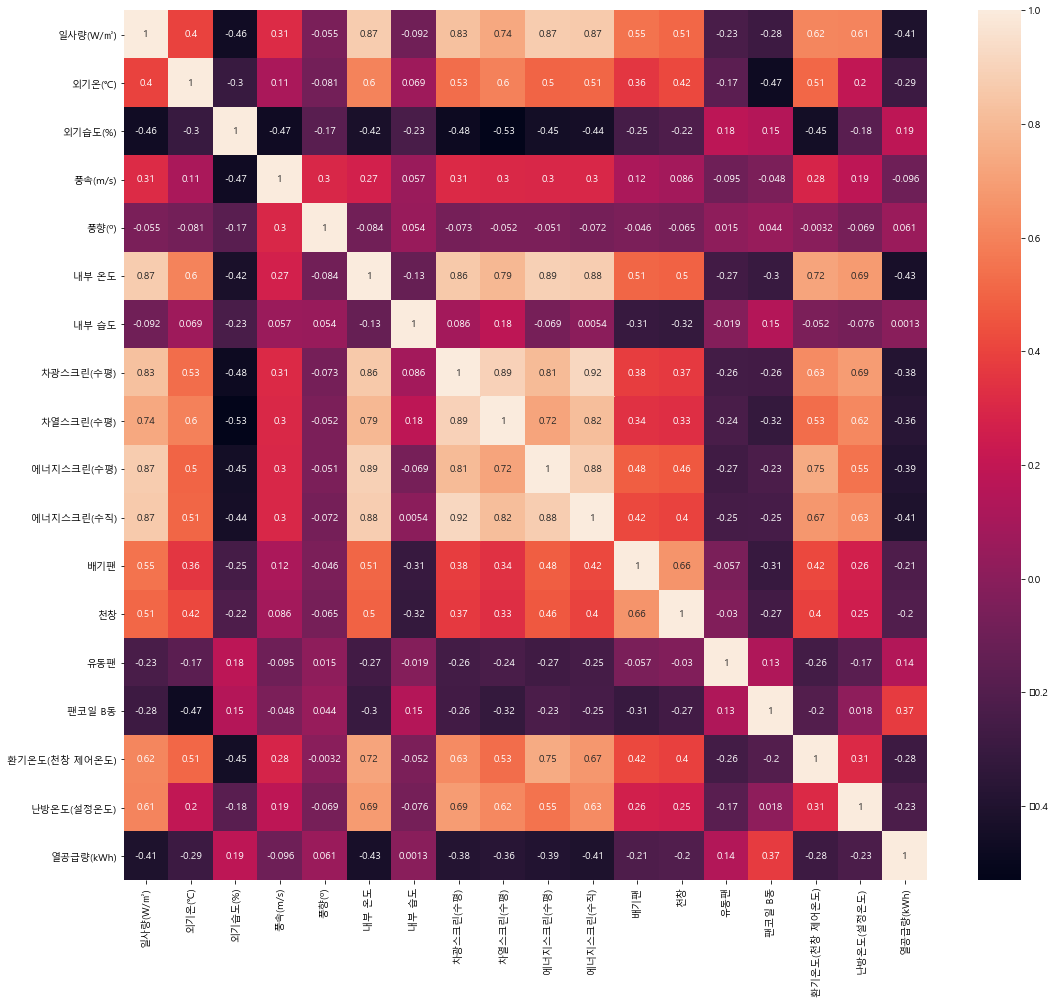

In [116]:
corr_df = smart_farm_nonull.drop(['시간', '년월일', '년도', '월', '일', '시', '분'],axis=1).corr(method='pearson')
plt.figure(figsize=(18, 16))
sns.heatmap(corr_df, annot=True)
plt.show()

# 상관관계가 기존의 열들 사이에서는 그리 높지 않게 나타남. 0.9 넘는 것 없음

In [120]:
corr_df[["환기온도(천창 제어온도)","난방온도(설정온도)"]].style.set_precision(2)

,환기온도(천창 제어온도),난방온도(설정온도)
일사량(W/㎡),0.62,0.61
외기온(℃),0.51,0.20
외기습도(%),-0.45,-0.18
풍속(m/s),0.28,0.19
풍향(º),-0.00,-0.07
내부 온도,0.72,0.69
내부 습도,-0.05,-0.08
차광스크린(수평),0.63,0.69
차열스크린(수평),0.53,0.62
에너지스크린(수평),0.75,0.55


In [179]:
smart_farm_nonull.to_csv("train_df.csv", encoding="utf-8-sig", index=False)

##### 결측치 직접 처리하기...
- train_df.csv : 결측치 직접 처리할 데이터

- train_df_null.csv : 결측치 직접 처리완료한 데이터

In [180]:
train_df_null = pd.read_csv("train_df_null.csv",encoding="cp949")

In [187]:
train_df_null.isnull().sum()

시간                0
년월일               0
년도                0
월                 0
일                 0
시                 0
분                 0
일사량(W/㎡)          0
외기온(℃)            0
외기습도(%)           0
풍속(m/s)           0
풍향(º)             0
내부 온도             0
내부 습도             0
차광스크린(수평)         0
차열스크린(수평)         0
에너지스크린(수평)        0
에너지스크린(수직)        0
배기팬               0
천창                0
유동팬               0
팬코일 B동            0
환기온도(천창 제어온도)    37
난방온도(설정온도)       65
열공급량(kWh)         0
dtype: int64

##### 난방온도 결측치 존재하는 것 다 제외
- 난방온도는 적절한 보간이 어렵고, 충분히 개수가 되지 않기에 제거

In [188]:
train_df_null = train_df_null[train_df_null["난방온도(설정온도)"].notnull()]

In [189]:
train_df_null.isnull().sum()

시간               0
년월일              0
년도               0
월                0
일                0
시                0
분                0
일사량(W/㎡)         0
외기온(℃)           0
외기습도(%)          0
풍속(m/s)          0
풍향(º)            0
내부 온도            0
내부 습도            0
차광스크린(수평)        0
차열스크린(수평)        0
에너지스크린(수평)       0
에너지스크린(수직)       0
배기팬              0
천창               0
유동팬              0
팬코일 B동           0
환기온도(천창 제어온도)    0
난방온도(설정온도)       0
열공급량(kWh)        0
dtype: int64

In [184]:
test_df_nonull2.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도                0
내부 습도                0
차광스크린(수평)            0
차열스크린(수평)            0
에너지스크린(수평)           0
에너지스크린(수직)           0
배기팬                  0
천창                   0
유동팬                  0
팬코일 B동               0
환기온도(천창 제어온도)      241
난방온도(설정온도)           0
열공급량(kWh)        18720
dtype: int64

##### 학습, 예측용 데이터 결합하기
- 데이터 결합하기

In [224]:
test_df_nonull2.to_csv("test.csv",encoding="utf-8-sig",index=False)

In [191]:
print("학습용 데이터의 길이",len(train_df_null))
print("예측용 데이터의 길이",len(test_df_nonull2))

학습용 데이터의 길이 130886
예측용 데이터의 길이 18720


In [193]:
train_test_df = pd.concat([train_df_null,test_df_nonull2],axis=0,ignore_index=True)

In [228]:
train_test_df["환기온도(천창 제어온도)"].desr

28.00    79192
30.00    41135
27.00    27791
27.10       80
27.60       74
27.80       72
27.20       72
27.90       71
27.50       67
27.40       66
27.30       61
27.70       59
28.90       38
29.10       37
29.70       37
28.10       37
28.70       36
29.90       36
28.40       35
28.60       34
29.80       34
29.60       34
29.20       33
28.20       31
29.50       31
29.30       30
29.40       30
28.50       29
28.80       29
28.30       27
29.00       25
29.35        1
27.85        1
Name: 환기온도(천창 제어온도), dtype: int64

In [210]:
null_idx = train_test_df[train_test_df["환기온도(천창 제어온도)"].isnull()].index
null_idx

Int64Index([136064, 136065, 136066, 136067, 136068, 136069, 136070, 136071,
            136072, 136073,
            ...
            136295, 136296, 136297, 136298, 136299, 136300, 136301, 136302,
            136303, 136304],
           dtype='int64', length=241)

### 분류대체 방법
- 예측용 데이터에 있는 환기온도 241개 데이터 결측치 해소
- 분류대체 방법 사용해보기
- 분류대체 방법도 연속적으로 줄어들거나 늘어나는 느낌이 안남

In [274]:
train_test_df_copy = train_test_df.copy()

In [275]:
train_test_df_copy.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도                0
내부 습도                0
차광스크린(수평)            0
차열스크린(수평)            0
에너지스크린(수평)           0
에너지스크린(수직)           0
배기팬                  0
천창                   0
유동팬                  0
팬코일 B동               0
환기온도(천창 제어온도)      241
난방온도(설정온도)           0
열공급량(kWh)        18720
dtype: int64

In [276]:
def to_categorical(x):
    if 27 <= x < 27.5:
        return 27
    elif 27.5 <= x < 29:
        return 28
    elif 29 <= x:
        return 30  

In [277]:
# 27, 28, 30으로 매핑하기
train_test_df_copy["환기온도(천창 제어온도)"] = train_test_df_copy["환기온도(천창 제어온도)"].apply(lambda x : to_categorical(x))

In [278]:
train_test_df_copy_all_nonull = train_test_df_copy.dropna(axis=0,how="any")

vent_temp = train_test_df_copy[train_test_df_copy["환기온도(천창 제어온도)"].isnull()]
# vent_temp(환기 온도) : 환기온도(천창 제어온도)만 null인 데이터

In [279]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '난방온도(설정온도)',"열공급량(kWh)"]

X = train_test_df_copy_all_nonull[col_lst]

y = train_test_df_copy_all_nonull["환기온도(천창 제어온도)"]

In [280]:
import lightgbm as lgbm
clf = lgbm.LGBMClassifier()
clf.fit(X=X,y=y)
predicted = clf.predict(vent_temp[col_lst])

In [281]:
predicted

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 27., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 27., 27., 27., 27., 30.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27

In [282]:
vent_temp['환기온도(천창 제어온도)'] = predicted

In [283]:
# 예측한 값들 채우기
train_test_df_copy.loc[vent_temp.index,"환기온도(천창 제어온도)"] = train_test_df_copy.loc[vent_temp.index,
                                                   "환기온도(천창 제어온도)"].fillna(vent_temp["환기온도(천창 제어온도)"])

In [284]:
train_test_df_copy.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도                0
내부 습도                0
차광스크린(수평)            0
차열스크린(수평)            0
에너지스크린(수평)           0
에너지스크린(수직)           0
배기팬                  0
천창                   0
유동팬                  0
팬코일 B동               0
환기온도(천창 제어온도)        0
난방온도(설정온도)           0
열공급량(kWh)        18720
dtype: int64

데이터 저장하기

In [289]:
train_test_df_copy.iloc[:130886,:].to_csv("smart_farm_train.csv",encoding="utf-8-sig",index=False)

In [292]:
train_test_df_copy.iloc[130886:,:].reset_index(drop=True).to_csv("smart_farm_test.csv",encoding="utf-8-sig",index=False)

### 회귀대체 방법
- 예측용 데이터에 있는 환기온도 241개 데이터 결측치 해소
- 회귀대체 방법 사용 불가

In [196]:
from sklearn import linear_model

In [199]:
train_test_df_nonull = train_test_df.copy()
# null 처리한 dataframe

In [219]:
smart_farm_all_nonull = train_test_df_nonull.dropna(axis=0,how="any")

vent_temp = train_test_df_nonull[train_test_df_nonull["난방온도(설정온도)"].notnull()]
# vent_temp(환기 온도) : 환기온도(천창 제어온도)만 null인 데이터

vent_temp : 환기온도 채우기

In [202]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '난방온도(설정온도)']

X = smart_farm_all_nonull[col_lst]

y = smart_farm_all_nonull["환기온도(천창 제어온도)"]

In [203]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(vent_temp[col_lst])

vent_temp_pred = pd.DataFrame(vent_temp[['시간','환기온도(천창 제어온도)']].fillna(pd.Series(y_pred.flatten())))
vent_temp['환기온도(천창 제어온도)'].fillna(pd.Series(y_pred.flatten()), inplace=True)

In [204]:
# 예측한 값들 채우기
train_test_df_nonull.loc[vent_temp.index,"환기온도(천창 제어온도)"] = train_test_df_nonull.loc[vent_temp.index,
                                                   "환기온도(천창 제어온도)"].fillna(vent_temp["환기온도(천창 제어온도)"])

In [212]:
train_test_df_nonull.to_csv("test.csv",encoding="utf-8-sig",index=False)

In [206]:
train_test_df_nonull.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도                0
내부 습도                0
차광스크린(수평)            0
차열스크린(수평)            0
에너지스크린(수평)           0
에너지스크린(수직)           0
배기팬                  0
천창                   0
유동팬                  0
팬코일 B동               0
환기온도(천창 제어온도)        0
난방온도(설정온도)           0
열공급량(kWh)        18720
dtype: int64

############################### 회귀대체 결측치 처리 잠시 보류 ###############################
- 상관관계가 높지 않아서 충분히 적절한 값이 나오지 않음

### 회귀대체 방법
- 상관관계 확인해보기
- 2개 열 모두 결측인 케이스 : 113개
- 1개 열만 결측인 케이스 : 114개

In [52]:
smart_farm_nonull[(smart_farm_nonull["환기온도(천창 제어온도)"].isnull()) & (smart_farm_nonull["난방온도(설정온도)"].isnull())].shape

(115, 25)

#### 1개 열만 결측인 경우
- smart_farm_all_nonull : 평균 보간 이후 결측치가 아예 없는 것

In [53]:
from sklearn import linear_model

In [54]:
smart_farm_all_nonull = smart_farm_nonull.dropna(axis=0,how="any")

vent_temp = smart_farm_nonull[smart_farm_nonull["난방온도(설정온도)"].notnull()]
# vent_temp(환기 온도) : 환기온도(천창 제어온도)만 null인 데이터

heat_temp = smart_farm_nonull[smart_farm_nonull["환기온도(천창 제어온도)"].notnull()]
# heat_temp(난방 온도) : 난방온도(설정온도)만 null인 데이터

vent_temp : 환기온도 채우기

In [55]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '난방온도(설정온도)', '열공급량(kWh)']

X = smart_farm_all_nonull[col_lst]

y = smart_farm_all_nonull["환기온도(천창 제어온도)"]

In [56]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(vent_temp[col_lst])

vent_temp_pred = pd.DataFrame(vent_temp[['시간','환기온도(천창 제어온도)']].fillna(pd.Series(y_pred.flatten())))
vent_temp['환기온도(천창 제어온도)'].fillna(pd.Series(y_pred.flatten()), inplace=True)

In [57]:
# 예측한 값들 채우기
smart_farm_nonull.loc[vent_temp.index,"환기온도(천창 제어온도)"] = smart_farm_nonull.loc[vent_temp.index,
                                                   "환기온도(천창 제어온도)"].fillna(vent_temp["환기온도(천창 제어온도)"])

heat_temp : 난방온도 채우기

In [58]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '환기온도(천창 제어온도)', '열공급량(kWh)']

X = smart_farm_all_nonull[col_lst]

y = smart_farm_all_nonull["난방온도(설정온도)"]

In [59]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(heat_temp[col_lst])

heat_temp_pred = pd.DataFrame(heat_temp[['시간','난방온도(설정온도)']].fillna(pd.Series(y_pred.flatten())))
heat_temp['난방온도(설정온도)'].fillna(pd.Series(y_pred.flatten()), inplace=True)

In [60]:
# 예측한 값들 채우기
smart_farm_nonull.loc[heat_temp.index,"난방온도(설정온도)"] = smart_farm_nonull.loc[heat_temp.index,
                                                   "난방온도(설정온도)"].fillna(heat_temp["난방온도(설정온도)"])

In [61]:
smart_farm_nonull.shape

(130951, 25)

#### 2개 열만 결측인 경우
- smart_farm_all_nonull : 평균 보간 이후 결측치가 아예 없는 것
- smart_farm_nonull : 결측치가 1개열만 있는 것은 채워지고 2개 열에 대한 결측만 존재하는 상태

index 이상없게 reset 한번 해주기

In [62]:
smart_farm_nonull.reset_index(drop=True,inplace=True)

In [63]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '열공급량(kWh)']

heat_vent_temp = smart_farm_nonull[(smart_farm_nonull["난방온도(설정온도)"].isnull()) &
                                   (smart_farm_nonull["환기온도(천창 제어온도)"].isnull())]

X = smart_farm_all_nonull[col_lst]

y_1 = smart_farm_all_nonull["난방온도(설정온도)"] ; y_2 = smart_farm_all_nonull["환기온도(천창 제어온도)"]

# 각각 예측하기
reg_1 = linear_model.LinearRegression() ; reg_1.fit(X,y_1)
reg_2 = linear_model.LinearRegression() ; reg_2.fit(X,y_2)

y_pred_1 = reg_1.predict(heat_vent_temp[col_lst])
y_pred_2 = reg_2.predict(heat_vent_temp[col_lst])

heat_vent_temp['난방온도(설정온도)'] =  y_pred_1.flatten()
heat_vent_temp['환기온도(천창 제어온도)'] = y_pred_2.flatten()

In [64]:
heat_vent_temp.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5513,2021-11-29 21:27:00,2021-11-29,2021,11,29,21,27,-3.5,6.1,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.951447,17.753899,0.0
5514,2021-11-29 21:30:00,2021-11-29,2021,11,29,21,30,-3.6,6.0,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.985119,17.255249,0.0
5515,2021-11-29 21:33:00,2021-11-29,2021,11,29,21,33,-3.5,5.8,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.918960,17.107802,0.0
5516,2021-11-29 21:36:00,2021-11-29,2021,11,29,21,36,-3.7,5.7,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.942981,17.650584,0.2
5517,2021-11-29 21:39:00,2021-11-29,2021,11,29,21,39,-3.6,5.5,74,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.978689,17.821769,0.6


In [65]:
smart_farm_nonull.loc[heat_vent_temp.index,"난방온도(설정온도)"] = smart_farm_nonull.loc[heat_vent_temp.index,
                                                   "난방온도(설정온도)"].fillna(heat_vent_temp["난방온도(설정온도)"])


smart_farm_nonull.loc[heat_vent_temp.index,"환기온도(천창 제어온도)"] = smart_farm_nonull.loc[heat_vent_temp.index,
                                                   "환기온도(천창 제어온도)"].fillna(heat_vent_temp["환기온도(천창 제어온도)"])

In [66]:
smart_farm_nonull.loc[[5513,5514],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5513,2021-11-29 21:27:00,2021-11-29,2021,11,29,21,27,-3.5,6.1,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.951447,17.753899,0.0
5514,2021-11-29 21:30:00,2021-11-29,2021,11,29,21,30,-3.6,6.0,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.985119,17.255249,0.0


### 결측치 처리 완료
- smart_farm_nonull : 학습데이터의 결측치 존재하지 않음

In [110]:
smart_farm_nonull.isnull().sum()

시간               0
년월일              0
년도               0
월                0
일                0
시                0
분                0
일사량(W/㎡)         0
외기온(℃)           0
외기습도(%)          0
풍속(m/s)          0
풍향(º)            0
내부 온도            0
내부 습도            0
차광스크린(수평)        0
차열스크린(수평)        0
에너지스크린(수평)       0
에너지스크린(수직)       0
배기팬              0
천창               0
유동팬              0
팬코일 B동           0
환기온도(천창 제어온도)    0
난방온도(설정온도)       0
열공급량(kWh)        0
dtype: int64

In [ ]:
#smart_farm_nonull.to_csv("train_df_nonull.csv",encoding="utf-8-sig",index=False)

In [112]:
test_df_nonull2.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2022-03-04 00:00:00,2022-03-04,2022,3,4,0,0,-4.0,2.0,76,...,0,0,0,0,0,1,1.0,28.0,18.0,NaN
1,2022-03-04 00:01:00,2022-03-04,2022,3,4,0,1,-4.1,2.0,76,...,0,0,0,0,0,1,1.0,28.0,18.0,NaN
2,2022-03-04 00:02:00,2022-03-04,2022,3,4,0,2,-4.1,1.9,76,...,0,0,0,0,0,1,1.0,28.0,18.0,NaN
3,2022-03-04 00:03:00,2022-03-04,2022,3,4,0,3,-4.1,1.9,76,...,0,0,0,0,0,1,1.0,28.0,18.0,NaN
4,2022-03-04 00:04:00,2022-03-04,2022,3,4,0,4,-4.2,1.9,76,...,0,0,0,0,0,1,1.0,28.0,18.0,NaN
